In [27]:
import tensorflow as tf
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [2]:
#from keras.datasets import cifar10
#(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [23]:
def sampling(train_dataX, train_dataY, test_dataX, test_dataY, tr_size, te_size):
    sampling_trainX = np.empty((0, 32, 32, 3), dtype=np.uint8)
    sampling_trainY = np.empty((0, train_dataY.shape[1]), dtype=np.uint8)
    sampling_testX = np.empty((0, 32, 32, 3), dtype=np.uint8)
    sampling_testY = np.empty((0, test_dataY.shape[1]), dtype=np.uint8)

    for i in range(10):
        train_index = np.where(train_dataY == i)[0][:tr_size]
        test_index = np.where(test_dataY == i)[0][:te_size]
        
        sampling_trainX = np.append(sampling_trainX, train_dataX[train_index], axis=0)
        sampling_trainY = np.append(sampling_trainY, np.array([[i]]*tr_size, dtype=np.uint8), axis=0)
        sampling_testX = np.append(sampling_testX, test_dataX[test_index], axis=0)
        sampling_testY = np.append(sampling_testY, np.array([[i]]*te_size, dtype=np.uint8), axis=0)
        
    shuffling_train_idx = np.arange(tr_size * 10)
    shuffling_test_idx = np.arange(te_size * 10)
    np.random.shuffle(shuffling_train_idx)
    np.random.shuffle(shuffling_test_idx)
        
    sampling_trainX = sampling_trainX[shuffling_train_idx]
    sampling_trainY = sampling_trainY[shuffling_train_idx]
    sampling_testX = sampling_testX[shuffling_test_idx]
    sampling_testY = sampling_testY[shuffling_test_idx]

    return sampling_trainX, sampling_trainY, sampling_testX, sampling_testY

# Nearest neighbor

In [5]:
class NN:
    def __init__(self, distance_type):
        self.distance_type = distance_type
        
    def Train(self, X, y):
        self.train_X = X
        self.train_y = y
        
    def Measure(self, x1, x2):
        if self.distance_type == 1:  # L1
            return np.sum(np.abs(x1 - x2), axis = 1)
        else:                        # L2
            return np.sqrt(np.sum(np.power(x1 - x2, 2), axis = 1))  
    
    def Predict(self, test_X):
        test_set = test_X.shape[0]
        pred = np.zeros(test_set)
        
        for i in tqdm(range(test_set)):
            distance = self.Measure(self.train_X, test_X[i])  # 전체 데이터 중에 입력받은 데이터와 가장 가까운 데이터 탐색하기 위함
            shortest_idx = np.argmin(distance) # k=1
            pred[i] = self.train_y[shortest_idx]  # 제일 닮은 이미지를 학습 데이터의 label 값을 저장
        
        return pred

In [28]:
X_train, y_train, X_test, y_test = sampling(X_train, y_train, X_test, y_test, 500, 50)

In [29]:
Xre_train = X_train.reshape(-1, 32 * 32 * 3)
Xre_test = X_test.reshape(-1, 32 * 32 * 3)

In [30]:
l1_nn = NN(1)
l1_nn.Train(Xre_train, y_train)

In [31]:
l1_prediction = l1_nn.Predict(Xre_test)

  0%|          | 0/500 [00:00<?, ?it/s]

In [32]:
print(f'{np.mean(l1_prediction == y_test.reshape(-1)) * 100}%')

21.8%


## Visulize Misclassification by each label

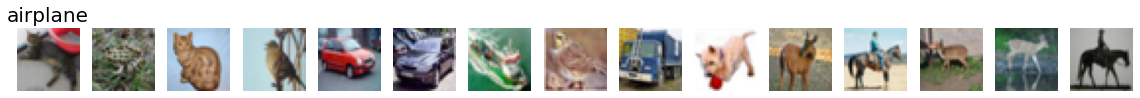

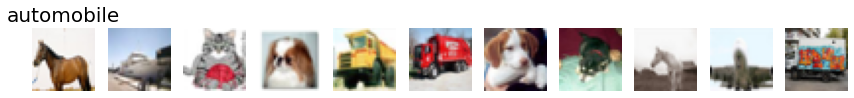

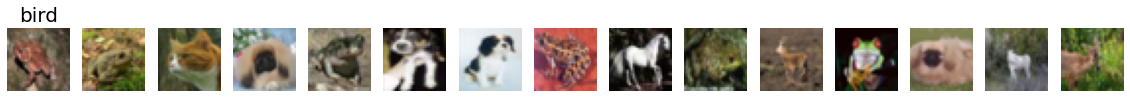

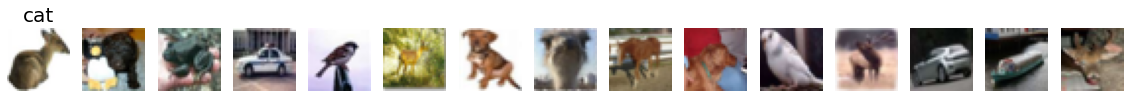

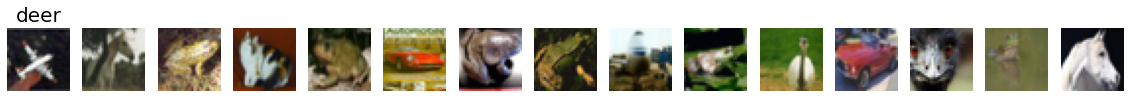

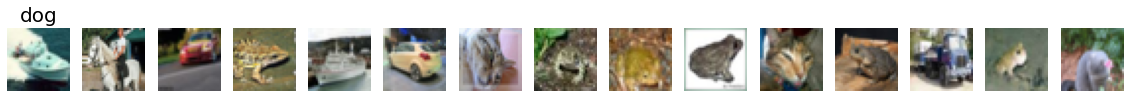

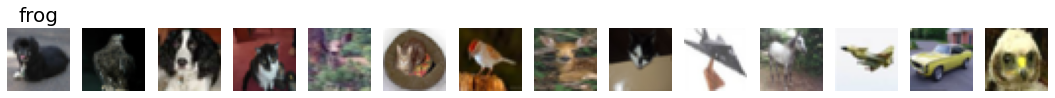

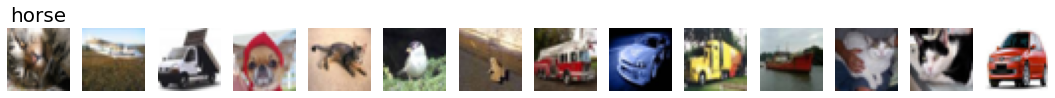

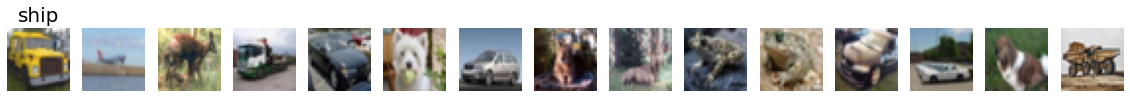

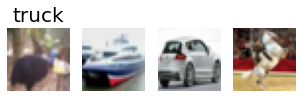

In [45]:
labels = ["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
misclassification  = l1_prediction != y_test.reshape(-1)
miss_label_idx = l1_prediction[np.flatnonzero(misclassification)] # label idx
miss_image_idx = np.flatnonzero(misclassification) # image idx
#average = int(np.mean([np.sum(len(np.where(miss_label_idx == i)[0])) for i in range(10)]))

for label in range(len(labels)):
    plt.figure(figsize=(20, 20))
    for i, image in enumerate(np.where(miss_label_idx == label)[0][:15]):
        plt.subplot(len(labels), 15, i + 1)
        plt.imshow(X_test[miss_image_idx[image]])
        plt.axis('off')
        if i == 0:
            plt.title(labels[label], fontsize=20)
    plt.show()

In [12]:
'''
labels = ["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
misclassification  = l1_prediction != y_test.reshape(-1)
miss_label_idx = l1_prediction[np.flatnonzero(misclassification)] # label idx
miss_image_idx = np.flatnonzero(misclassification) # image idx
average = int(np.mean([np.sum(len(np.where(miss_label_idx == i)[0])) for i in range(10)]))

plt.figure(figsize=(20, 20))
for label in range(len(labels)):
    for i, image in enumerate(np.where(miss_label_idx == label)[0][:average]):
        plt.subplot(average, len(labels), i * len(labels) + label + 1)
        plt.imshow(X_test[miss_image_idx[image]])
        plt.axis('off')
        if i == 0:
            plt.title(labels[label], fontsize=20)
plt.show()
'''

'\nlabels = ["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]\nmisclassification  = l1_prediction != y_test.reshape(-1)\nmiss_label_idx = l1_prediction[np.flatnonzero(misclassification)] # label idx\nmiss_image_idx = np.flatnonzero(misclassification) # image idx\naverage = int(np.mean([np.sum(len(np.where(miss_label_idx == i)[0])) for i in range(10)]))\n\nplt.figure(figsize=(20, 20))\nfor label in range(len(labels)):\n    for i, image in enumerate(np.where(miss_label_idx == label)[0][:average]):\n        plt.subplot(average, len(labels), i * len(labels) + label + 1)\n        plt.imshow(X_test[miss_image_idx[image]])\n        plt.axis(\'off\')\n        if i == 0:\n            plt.title(labels[label], fontsize=20)\nplt.show()\n'

In [46]:
l2_nn = NN(2)
l2_nn.Train(Xre_train, y_train)
l2_prediction = l2_nn.Predict(Xre_test)

  0%|          | 0/500 [00:00<?, ?it/s]

In [47]:
print(f'{np.mean(l2_prediction == y_test.reshape(-1)) * 100}%')

17.0%


# k Nearest neighbor

In [15]:
class kNN:
    def __init__(self, k, distance_type=1):
        self.distance_type = distance_type
        self.k = k
        
    def Train(self, X, y):
        self.train_X = X
        self.train_y = y
        
    def Measure(self, test_X):
        train_set = self.train_X.shape[0]
        test_set = test_X.shape[0]
        distance = np.zeros((test_set, train_set))
        
        for i in range(test_set):
            if self.distance_type == 1:  # L1
                distance[i, :] = np.sum(np.abs(self.train_X - test_X[i]), axis = 1)
            else:                        # L2
                distance[i, :] = np.sqrt(np.sum(np.power(self.train_X - test_X[i, :], 2), axis=1))
            
        return distance
    
    def Predict(self, test_X):
        distance = self.Measure(test_X)
        test_set = distance.shape[0]
        pred = np.zeros(test_set)
        
        for i in range(test_set):
            closest_label = []
            idx = np.argsort(distance[i, :])[:self.k]  #  거리가 짧은 순으로 index 정렬, 가까운 순으로 k개 선택
            closest_label = self.train_y[idx]  # 선택된 k개의 데이터의 label을 저장
            pred[i] = np.argmax(np.bincount(closest_label.reshape(-1)))  # 빈도가 가장 높은 label을 test의 label로 예측
        
        return pred

In [16]:
def cross_validation(X, y, folds, k):
    k_set = [i for i in range(1, k+1)]

    fold_split = np.array_split(range(X.shape[0]), folds)  # train data의 길이를 fold만큼 나눔, data들은 index에 해당
    X_train_validation_set = [X[fold_split[i]] for i in range(folds)]  # fold 별 index에 해당하는 data들로 validation set 구성
    y_train_validation_set = [y[fold_split[i]] for i in range(folds)]

    res = {}

    for k in tqdm(k_set):
        accuracies = []
        for i in range(folds):  # (train, test) = ((1,2,3,4), 0), ((0,2,3,4), 1), ((0,1,3,4), 2) ...
            X_validation_train = np.concatenate(X_train_validation_set[:i] + X_train_validation_set[i+1:])  # train fold
            X_validation_test = X_train_validation_set[i]  # test fold
            y_validation_train = np.concatenate(y_train_validation_set[:i] + y_train_validation_set[i+1:])
            y_validation_test = y_train_validation_set[i]

            run = kNN(k)
            run.Train(X_validation_train, y_validation_train)
            prediction = run.Predict(X_validation_test)

            accuracy = np.mean(prediction == y_validation_test.reshape(-1))
            accuracies.append(accuracy)  # fold 별 정확도 저장

        res[k] = accuracies  # k: accuracy of folds

    return res

In [17]:
def visualize(k, validation):
    k_set = [i for i in range(1, k+1)]
    line = [np.mean(validation[i]) for i in k_set]

    plt.plot(k_set, line)
    for k in k_set:
        accuracies = validation[k]
        plt.scatter(k, np.mean(accuracies))

    
    plt.title('Average Accuracy According to k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.show()

In [48]:
val_res = cross_validation(Xre_train, y_train, 5, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

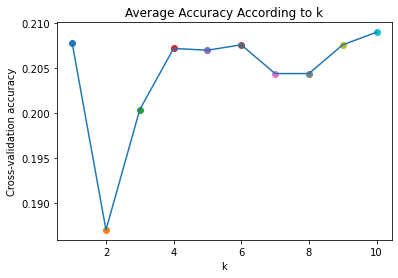

In [49]:
visualize(10, val_res)

In [50]:
k_set = [i for i in range(1, 11)]
result = []

for k in tqdm(k_set):
    run_knn = kNN(k)
    run_knn.Train(Xre_train, y_train)
    prediction = run_knn.Predict(Xre_test)
    result.append(f'k = {k}: {np.mean(prediction == y_test.reshape(-1)) * 100}%')

result

  0%|          | 0/10 [00:00<?, ?it/s]

['k = 1: 21.8%',
 'k = 2: 18.4%',
 'k = 3: 19.0%',
 'k = 4: 17.4%',
 'k = 5: 20.0%',
 'k = 6: 19.400000000000002%',
 'k = 7: 18.8%',
 'k = 8: 18.6%',
 'k = 9: 19.0%',
 'k = 10: 20.200000000000003%']

* Reference
    * https://cs231n.github.io/assignments2020/assignment1/